In [2]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm

In [3]:
# 현재경로 확인
os.getcwd()

'C:\\Users\\Younjiei\\Desktop\\패스트캠퍼스\\머신러닝&데이터분석\\2. [Machine Learning]\\PART 2) 회귀분석\\1. Jupyter Notebook ( Typing 용)'

In [4]:
# 데이터 불러오기
boston = pd.read_csv("../3. 실습데이터/Boston_house.csv")
boston

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


In [5]:
boston_data = boston.drop(['Target'],axis=1)
# boston_data

In [6]:
'''
타겟 데이터
1978 보스턴 주택 가격
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

특징 데이터
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율'''

'\n타겟 데이터\n1978 보스턴 주택 가격\n506개 타운의 주택 가격 중앙값 (단위 1,000 달러)\n\n특징 데이터\nCRIM: 범죄율\nINDUS: 비소매상업지역 면적 비율\nNOX: 일산화질소 농도\nRM: 주택당 방 수\nLSTAT: 인구 중 하위 계층 비율\nB: 인구 중 흑인 비율\nPTRATIO: 학생/교사 비율\nZN: 25,000 평방피트를 초과 거주지역 비율\nCHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0\nAGE: 1940년 이전에 건축된 주택의 비율\nRAD: 방사형 고속도로까지의 거리\nDIS: 직업센터의 거리\nTAX: 재산세율'

# crim, rm, lstat을 통한 다중 선형 회귀분석

In [7]:
x_data=boston[['CRIM','RM','LSTAT']] ##변수 여러개
target = boston[['Target']]
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [8]:
x_data1 = sm.add_constant(x_data, has_constant='add')
#상수항

In [9]:
multi_model = sm.OLS(target,x_data1)
fitted_multi_model=multi_model.fit()

In [10]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          1.01e-112
Time:                        04:36:44   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# crim, rm, lstat, b, tax, age, zn, nox, indus 변수를 통한 다중선형회귀분석

In [11]:

x_data2=boston[['CRIM','RM','LSTAT','B','TAX','AGE','ZN','NOX','INDUS']]
x_data2.head()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
0,0.00632,6.575,4.98,396.90,296,65.2,18.0,0.538,2.31
1,0.02731,6.421,9.14,396.90,242,78.9,0.0,0.469,7.07
2,0.02729,7.185,4.03,392.83,242,61.1,0.0,0.469,7.07
3,0.03237,6.998,2.94,394.63,222,45.8,0.0,0.458,2.18
4,0.06905,7.147,5.33,396.90,222,54.2,0.0,0.458,2.18


In [12]:
# 상수항추기
x_data22=sm.add_constant(x_data2,has_constant='add')

In [13]:
# 회귀모델 적합
mul_model2=sm.OLS(target,x_data22)
fit_mul_model=mul_model2.fit()

In [14]:
#변수3개 모델 결과
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          1.01e-112
Time:                        04:36:44   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# 변수9개모델
fit_mul_model.summary()
# p-value높아짐->귀무가설 채택->변수의 설명력이 없다
# 3개 모델에 비해 CRIM변수의 p-value가 높아짐!
# 나머지는 p-value가 낮다, NOX와 INDUS 빼고 이 줄은 높으므로 빼는게 좋다
# 만약 몇개의 변수를 빼면 나머지의 p-value는 낮아짐 왜?-> 그 둘이 가져가는 변동을 나머지 중복되는 애들이 가져가므로(다중공선성)
#age랑 crim의 p-value는 애매 판단으로 빼거나 넣음

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          5.76e-111
Time:                        04:36:44   Log-Likelihood:                -1565.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     496   BIC:                             3193.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1088      3.828     -1.857      0.064     -14.631       0.413
CRIM          -0.0453      0.036     -1.269      0.205      -0.115       0.025
RM             5.0922      0.458     11.109      0.000       4.192       5.993
LSTAT         -0.5651      0.057     -9.854      0.000      -0.678      -0.452
B              0.0090      0.003      2.952      0.003       0.003       0.015
TAX           -0.0060      0.002     -2.480      0.013      -0.011      -0.001
AGE            0.0236      0.014      1.653      0.099      -0.004       0.052
ZN             0.0294      0.013      2.198      0.028       0.003       0.056
NOX            3.4838      3.833      0.909      0.364      -4.047      11.014
INDUS          0.0293      0.065      0.449      0.654      -0.099       0.157
==============================================================================
Omnibus:                      195.490   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              872.873
Skew:                           1.686   Prob(JB):                    2.87e-190
Kurtosis:                       8.479   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# 세변수만 추가한 모델의 회귀 계수 
fitted_multi_model.params

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64

In [17]:
# full모델의 회귀계수
fit_mul_model.params
#3개만 했을 때보다 회기계수의 절댓값이 낮아졌다 
#그 이유는 중복으로 설명하는 변동을 다 가져갈 수 없으므로 각가의 변수 x가 y를 설명하는것을 다른변수에게 빼앗긴다

const   -7.108827
CRIM    -0.045293
RM       5.092238
LSTAT   -0.565133
B        0.008974
TAX     -0.006025
AGE      0.023619
ZN       0.029377
NOX      3.483832
INDUS    0.029270
dtype: float64

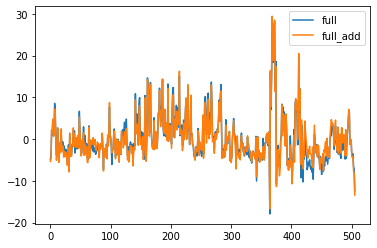

In [18]:
# base모델과 full모델의 잔차비교 
import matplotlib.pyplot as plt
fitted_multi_model.resid.plot(label="full")
fit_mul_model.resid.plot(label="full_add")
plt.legend()
#잔차가 큰차이가 없다

## 3개를 쓴 모델과 더많이 쓴 모델 중 하나만 고르면 ??
### 두개 모델의 R^2 값이 크게 차이 나지 않고(비슷한 성능) 일 떄  3개만 쓴 모델을 골라야한다
### 변수가 작은 모델이 관리하기 쉽고 비용도 절감

# 상관계수/산점도를 통해 다중공선성 확인
### 변수들 간에 선형관계에 있을때 다중공선성이 생긴다
### 다중공선성이 생기면 예측력하락,회기계수 이상해짐
### 회기계수가 이상해지는 이유는 b를 구하는 식에서 xT-1를 못구하기 때문

In [19]:
# 상관행렬 
x_data2.corr()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
CRIM,1.000000,-0.219247,0.455621,-0.385064,0.582764,0.352734,-0.200469,0.420972,0.406583
RM,-0.219247,1.000000,-0.613808,0.128069,-0.292048,-0.240265,0.311991,-0.302188,-0.391676
LSTAT,0.455621,-0.613808,1.000000,-0.366087,0.543993,0.602339,-0.412995,0.590879,0.603800
B,-0.385064,0.128069,-0.366087,1.000000,-0.441808,-0.273534,0.175520,-0.380051,-0.356977
TAX,0.582764,-0.292048,0.543993,-0.441808,1.000000,0.506456,-0.314563,0.668023,0.720760
AGE,0.352734,-0.240265,0.602339,-0.273534,0.506456,1.000000,-0.569537,0.731470,0.644779
ZN,-0.200469,0.311991,-0.412995,0.175520,-0.314563,-0.569537,1.000000,-0.516604,-0.533828
NOX,0.420972,-0.302188,0.590879,-0.380051,0.668023,0.731470,-0.516604,1.000000,0.763651
INDUS,0.406583,-0.391676,0.603800,-0.356977,0.720760,0.644779,-0.533828,0.763651,1.000000


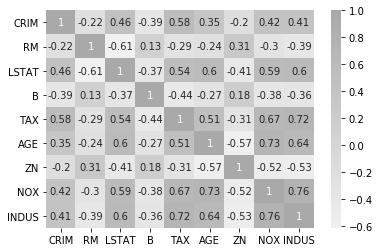

In [20]:
## 상관행렬 시각화 해서 보기 
import seaborn as sns;
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(x_data2.corr(), annot=True, cmap=cmap)
plt.show()
#nox와 indus ,tax,age 상관관계가 매우 높음

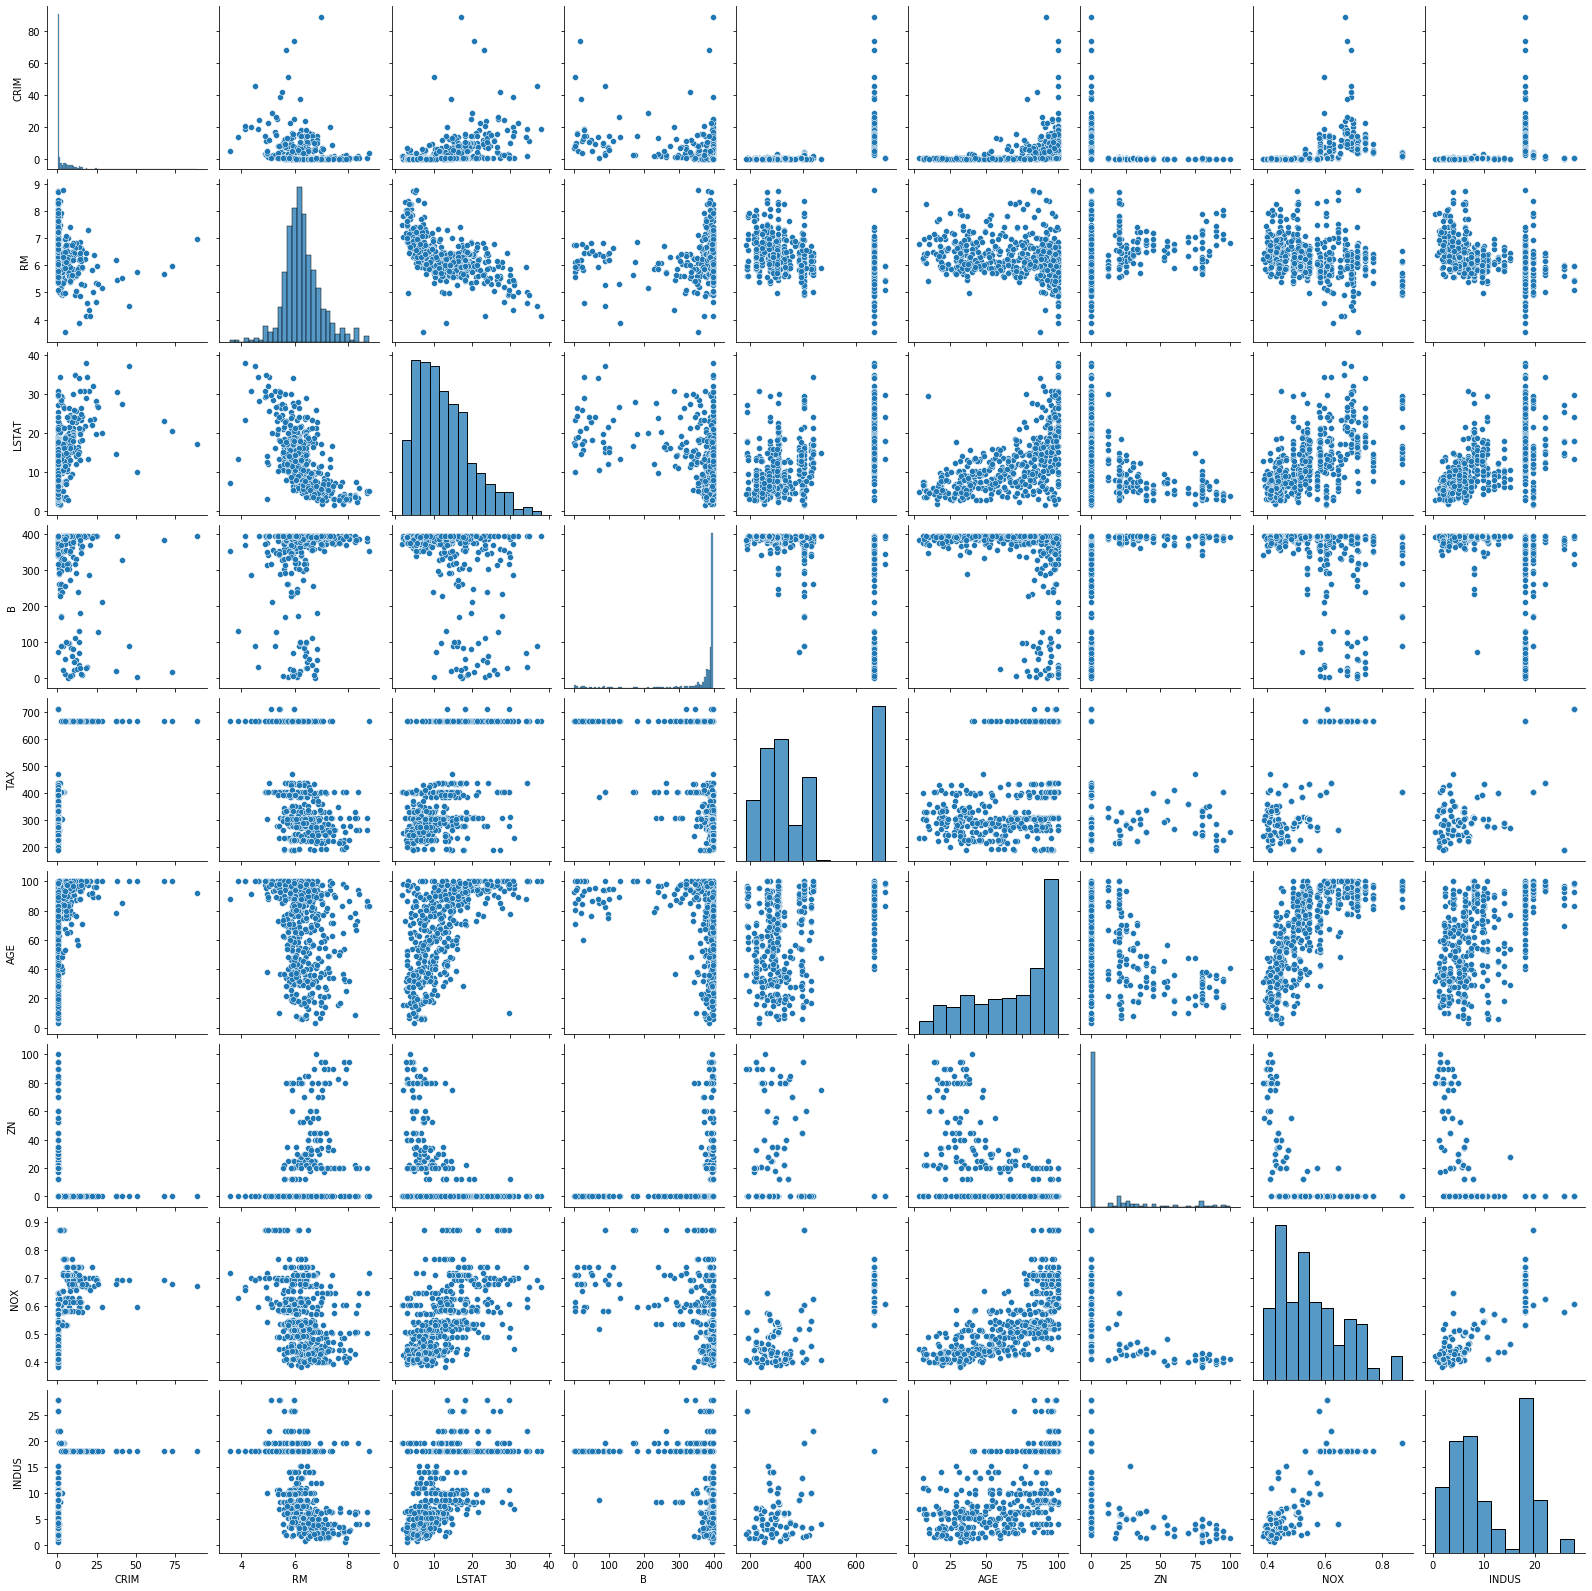

In [21]:
## 변수별 산점도 시각화
sns.pairplot(x_data2)
plt.show()

# VIF를 통한 다중공선성 확인 

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
#모든 칼럼의 vif를 구해서 넣기
vif["features"] = x_data2.columns
##vif

In [23]:
vif
#vif: 그 변수를 y로 두고 나머지 변수들로 회기를 했을 때 나머지 변수들로 그 변수를 설명하는 변동의 비율
#vif가 10 이상이면 다중공선성이 있다고 판단
#nox가 가장 큼
# 그 경우에는 vif거 높은 변수를 제거 해서 해보기

,VIF Factor,features
0,1.917332,CRIM
1,46.535369,RM
2,8.844137,LSTAT
3,16.856737,B
4,19.923044,TAX
5,18.457503,AGE
6,2.086502,ZN
7,72.439753,NOX
8,12.642137,INDUS


In [24]:
## nox 변수 제거후(X_data3) VIF 확인 
## 제거하면 다른 변수들의 vif줄어듬
vif = pd.DataFrame()
x_data3= x_data2.drop('NOX',axis=1)
vif["VIF Factor"] = [variance_inflation_factor( x_data3.values, i) for i in range(x_data3.shape[1])]
vif["features"] = x_data3.columns
vif

,VIF Factor,features
0,1.916648,CRIM
1,30.806301,RM
2,8.171214,LSTAT
3,16.735751,B
4,18.727105,TAX
5,16.339792,AGE
6,2.074500,ZN
7,11.217461,INDUS


### RM변수가 vif가 높음 그러나 위에 산점도를 보면 다른 변수중 상관관계가 있어 보이는 것은 lstat 빼고 거의 없다 
### 그러므로 vif는 높지만 다른정보들을 봐서는 지우지 않는게 맞다

In [25]:
## 그래도 한번 제거 해보자!
## RM 변수 제거후(x_data4) VIF 확인 

vif = pd.DataFrame()
x_data4= x_data3.drop('RM',axis=1)
vif["VIF Factor"] = [variance_inflation_factor( x_data4.values, i) for i in range(x_data4.shape[1])]
vif["features"] = x_data4.columns
vif

,VIF Factor,features
0,1.907517,CRIM
1,7.933529,LSTAT
2,7.442569,B
3,16.233237,TAX
4,13.765377,AGE
5,1.820070,ZN
6,11.116823,INDUS


In [26]:
# nox 변수 제거한 데이터(x_data3) 상수항 추가 후 회귀 모델 적합
# nox, rm 변수 제거한 데이터(x_data4) 상수항 추가 후 회귀 모델 적합
data3_model=sm.add_constant(x_data3,has_constant='add')
data4_model=sm.add_constant(x_data4,has_constant='add')
data3_md=sm.OLS(target,data3_model)
data4_md=sm.OLS(target,data4_model)

fit_data3=data3_md.fit()
fit_data4=data4_md.fit()

In [27]:
## 회귀모델 결과 비교 
fit_data3.summary()
#nox를 제거하기 전이랑 제거 한 후와 R^2값의 차이가 없다
#즉, nox가 차지하는 변동성이 별로 없다

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     121.6
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          7.62e-112
Time:                        04:37:15   Log-Likelihood:                -1566.0
No. Observations:                 506   AIC:                             3150.
Df Residuals:                     497   BIC:                             3188.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9162      3.596     -1.645      0.101     -12.981       1.149
CRIM          -0.0451      0.036     -1.264      0.207      -0.115       0.025
RM             5.1027      0.458     11.138      0.000       4.203       6.003
LSTAT         -0.5628      0.057     -9.825      0.000      -0.675      -0.450
B              0.0087      0.003      2.880      0.004       0.003       0.015
TAX           -0.0056      0.002     -2.344      0.019      -0.010      -0.001
AGE            0.0287      0.013      2.179      0.030       0.003       0.055
ZN             0.0284      0.013      2.130      0.034       0.002       0.055
INDUS          0.0486      0.062      0.789      0.431      -0.072       0.170
==============================================================================
Omnibus:                      193.530   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.773
Skew:                           1.677   Prob(JB):                    5.98e-184
Kurtosis:                       8.364   Cond. No.                     8.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
fit_data4.summary()
# 갑자기 R^2가 확 줄어 들었음 ==RM은 제거 하면 안된다(중요한 변수다)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     97.20
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           5.53e-89
Time:                        04:37:15   Log-Likelihood:                -1622.3
No. Observations:                 506   AIC:                             3261.
Df Residuals:                     498   BIC:                             3294.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6634      1.844     16.087      0.000      26.041      33.286
CRIM          -0.0329      0.040     -0.825      0.410      -0.111       0.045
LSTAT         -0.9256      0.053    -17.589      0.000      -1.029      -0.822
B              0.0046      0.003      1.384      0.167      -0.002       0.011
TAX           -0.0048      0.003     -1.814      0.070      -0.010       0.000
AGE            0.0703      0.014      4.993      0.000       0.043       0.098
ZN             0.0513      0.015      3.490      0.001       0.022       0.080
INDUS         -0.0357      0.068     -0.523      0.601      -0.170       0.098
==============================================================================
Omnibus:                      138.742   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.077
Skew:                           1.427   Prob(JB):                     2.32e-69
Kurtosis:                       5.617   Cond. No.                     3.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 학습 / 검증데이터 분할

In [29]:
from sklearn.model_selection import train_test_split
X = x_data22
y = target

train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state = 1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(354, 10) (152, 10) (354, 1) (152, 1)


In [30]:
# train_x에 상수항 추가 후 회귀모델 적합
# 상수항은 이미 추가 되어있기에 생략
fit_1=sm.OLS(train_y,train_x)
fit_mo1=fit_1.fit()
fit_mo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     64.33
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           2.26e-68
Time:                        04:37:15   Log-Likelihood:                -1105.9
No. Observations:                 354   AIC:                             2232.
Df Residuals:                     344   BIC:                             2270.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3168      4.742      0.489      0.625      -7.010      11.644
CRIM          -0.0218      0.047     -0.468      0.640      -0.114       0.070
RM             4.0273      0.569      7.084      0.000       2.909       5.146
LSTAT         -0.6255      0.069     -9.018      0.000      -0.762      -0.489
B              0.0062      0.004      1.604      0.110      -0.001       0.014
TAX           -0.0051      0.003     -1.714      0.087      -0.011       0.001
AGE            0.0282      0.018      1.588      0.113      -0.007       0.063
ZN             0.0384      0.017      2.291      0.023       0.005       0.071
NOX           -0.0832      4.675     -0.018      0.986      -9.278       9.112
INDUS          0.0517      0.081      0.637      0.525      -0.108       0.211
==============================================================================
Omnibus:                      140.873   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.620
Skew:                           1.717   Prob(JB):                    3.36e-124
Kurtosis:                       8.173   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

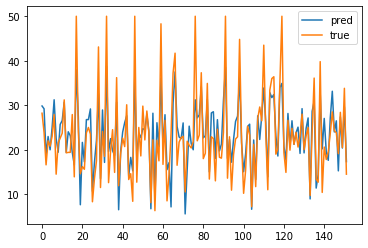

In [31]:
## 검등데이터 에대한 예측값과 true값 비교 
plt.plot(np.array(fit_mo1.predict(test_x)),label="pred")#예측값
plt.plot(np.array(test_y),label="true")#실제값
plt.legend()
plt.show()

In [32]:
## x_data3와 x_data4 학습 검증데이터 분할
from sklearn.model_selection import train_test_split
X = data3_model
y = target

train3_x, test3_x, train3_y, test3_y = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state = 1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(354, 10) (152, 10) (354, 1) (152, 1)


In [33]:
X = data4_model
y = target

train4_x, test4_x, train4_y, test4_y = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state = 1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(354, 10) (152, 10) (354, 1) (152, 1)


In [34]:
# x_data3/x_data4 회귀 모델 적합(fit2,fit3)
fit3_mo=sm.OLS(train3_y,train3_x)
fit4_mo=sm.OLS(train4_y,train4_x)
fit3_model=fit3_mo.fit()
fit4_model=fit4_mo.fit()

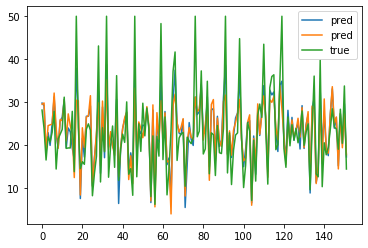

In [35]:
plt.plot(np.array(fit3_model.predict(test3_x)),label="pred")
plt.plot(np.array(fit4_model.predict(test4_x)),label="pred")
plt.plot(np.array(test3_y),label="true")
plt.legend()
plt.show()

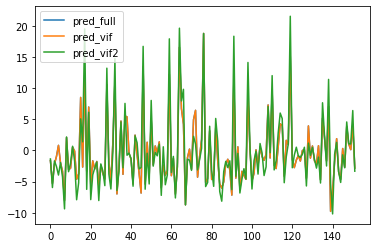

In [36]:
plt.plot(np.array(test3_y['Target']-fit_mo1.predict(test_x)),label="pred_full")#잔차
plt.plot(np.array(test3_y['Target']-fit3_model.predict(test3_x)),label="pred_vif")
plt.plot(np.array(test3_y['Target']-fit4_model.predict(test4_x)),label="pred_vif2")
plt.legend()
plt.show()

# MSE를 통한 검증데이터에 대한 성능비교 

In [37]:
from sklearn.metrics import mean_squared_error


In [46]:
mean_squared_error(y_true= test3_y['Target'], y_pred= fit3_model.predict(test3_x))

26.140062609846407

In [47]:
mean_squared_error(y_true= test3_y['Target'], y_pred= fit4_model.predict(test4_x))
#9개 변수에서 2개 변수 제거한것이 mse가 가장큼 좋지 x

38.7884531791283

In [48]:
mean_squared_error(y_true= test3_y['Target'], y_pred= fit_mo1.predict(test_x))

26.148631468819858